In [20]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, Dataset 
import torchvision

In [21]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print('device: ' + str(device))

size_input = 784
size_hidden = 200
n_classes = 100

n_epochs = 2
batch_size = 100
n_iter = n_epochs // batch_size
learn_r = 0.001

path = ''
train_data = torchvision.datasets.MNIST(root=path, train=True, transform=torchvision.transforms.ToTensor())
test_data = torchvision.datasets.MNIST(root=path, train=False, transform=torchvision.transforms.ToTensor())

train_loader = DataLoader(train_data, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_data, batch_size=10000, shuffle=False)

class NeuralNet(nn.Module):
    
    def __init__(self):
        super(NeuralNet, self).__init__()
        self.lin_1 = nn.Linear(size_input, size_hidden)
        self.lin_2 = nn.Linear(size_hidden, n_classes)
        
    def forward(self, inp):
        out_1 = torch.relu(self.lin_1(inp))
        out_2 = self.lin_2(out_1)
        return out_2

model = NeuralNet().to(device)

device: cpu


In [3]:
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learn_r)

for epoch in range(n_epochs):
    for i, batch in enumerate(train_loader):
        images, labels = batch
        flat_images = torch.reshape(images, (-1, size_input)).to(device)
        y_pred = model(flat_images).to(device)
        loss = criterion(y_pred, labels)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        if i%100==0:
            print(epoch, loss)
        
        

0 tensor(2.3082, grad_fn=<NllLossBackward>)
0 tensor(0.4485, grad_fn=<NllLossBackward>)
0 tensor(0.4349, grad_fn=<NllLossBackward>)
0 tensor(0.2091, grad_fn=<NllLossBackward>)
0 tensor(0.2543, grad_fn=<NllLossBackward>)
0 tensor(0.2631, grad_fn=<NllLossBackward>)
1 tensor(0.2615, grad_fn=<NllLossBackward>)
1 tensor(0.1242, grad_fn=<NllLossBackward>)
1 tensor(0.1959, grad_fn=<NllLossBackward>)
1 tensor(0.1822, grad_fn=<NllLossBackward>)
1 tensor(0.2040, grad_fn=<NllLossBackward>)
1 tensor(0.1528, grad_fn=<NllLossBackward>)


In [4]:
with torch.no_grad():
    for test_data in test_loader:
        images, labels = test_data
        flat_images = torch.reshape(images, (-1, size_input))
        y_pred = model(flat_images)
        max_inidices = torch.max(y_pred, dim=1)[1]
        n_correct = (labels == max_inidices).sum()

        print(n_correct.item()/10000)


0.9526


prediction : 7


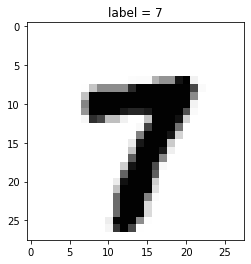

In [6]:
test_iter = iter(test_loader)
test_images, test_labels = test_iter.next()

def test():
    i = np.random.randint(10000)
    image = test_images[i,0]
    label = test_labels[i]
    plt.imshow(image, cmap='Greys')
    plt.title('label = ' + str(label.item()))
    with torch.no_grad():
        flat_image = torch.reshape(image, (1, 784))
        y_pred = model(flat_image)
        max_index = torch.argmax(y_pred).item()
        print('prediction :', max_index)
test()